In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
data = pd.read_excel(r"D:\PROGRAMMING\DS_ML\FlightPrecitor\Data_Train.xlsx")

In [121]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [123]:
data.shape

(10683, 11)

In [124]:
data.count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

In [125]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [126]:
data.describe

<bound method NDFrame.describe of            Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO 

In [127]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [128]:
#above is basic info abt our dataset
#from below , we first dealin with missing values in route nd total stops

In [129]:
data.isna()   #data.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [130]:
data.isna().sum() #gives sum of missing values in each feature

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [131]:
#now gettin exactly the tuple thats missing with conditional statement 
data[data['Route'].isna() | data['Total_Stops'].isna()]  # |->or , sq bracket is reachin or traversing to that feature 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [132]:
# two ways to deal missing values : edit them or omit them
# if edit . fill it with appropriate domain knowledge value
# here since its just 1  , its okay to omit the values so we use this approach here

In [133]:
data.dropna(inplace = True)  #drop datapoint is done but dropna but temporarily , for permanent inplace = True

In [134]:
data.isna().sum() #voila

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [135]:
data.count()

Airline            10682
Date_of_Journey    10682
Source             10682
Destination        10682
Route              10682
Dep_Time           10682
Arrival_Time       10682
Duration           10682
Total_Stops        10682
Additional_Info    10682
Price              10682
dtype: int64

In [136]:
################part 1 done

In [137]:
############### part 2 begins

In [138]:
## every aspect of machine learning , every data has to be converted to numbers or numericals as thats the only one
# m,achines can understand

In [139]:
# Choosing 8 features : 
#Duration , Departure and arrival time , Date of Journey , Total Stops , Additional info , Airline , Source and 
# and destination , route

In [140]:
# Say duration its 2hr 50mins to mins for example


In [141]:
def convert_duration(duration):
        if len(duration.split())==2:
            hours=int(duration.split()[0][:-1])
            minutes=int(duration.split()[0][:-1])
            return hours*60 + minutes
        else:
            return int(duration[: -1])*60

In [142]:
data['Duration']=data['Duration'].apply(convert_duration)
## giving error now cuz it has already been executed once by me.

In [143]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,122,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,427,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,305,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,244,1 stop,No info,13302


In [144]:
#departure time 

In [145]:
data['Dep_Time']=pd.to_datetime(data['Dep_Time'])
data['Arrival_Time']=pd.to_datetime(data['Arrival_Time'])
data.dtypes
#changing datatypes of dep time nd arrival time to date so we can apply that fucn

Airline                    object
Date_of_Journey            object
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                    int64
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [146]:
data['Dep_Time_in_hours']=data['Dep_Time'].dt.hour
data['Dep_Time_in_minutes']=data['Dep_Time'].dt.hour
data['Arrival_Time_in_hours']=data['Arrival_Time'].dt.hour
data['Arrival_Time_in_minutes']=data['Arrival_Time'].dt.hour
#new columns with new formats
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2023-06-05 22:20:00,2023-03-22 01:10:00,122,non-stop,No info,3897,22,22,1,1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-05 05:50:00,2023-06-05 13:15:00,427,2 stops,No info,7662,5,5,13,13
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-05 09:25:00,2023-06-10 04:25:00,1140,2 stops,No info,13882,9,9,4,4
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,2023-06-05 18:05:00,2023-06-05 23:30:00,305,1 stop,No info,6218,18,18,23,23
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,2023-06-05 16:50:00,2023-06-05 21:35:00,244,1 stop,No info,13302,16,16,21,21


In [147]:
#now since we have new formated duration we simply drop old ones
data.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)
#drop whatever is in drop[] , they are coloumns (axis=1), permanently (inplace)
data.head()
#already deleted on reexecution error

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,122,non-stop,No info,3897,22,22,1,1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,427,2 stops,No info,7662,5,5,13,13
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,9,4,4
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,305,1 stop,No info,6218,18,18,23,23
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,244,1 stop,No info,13302,16,16,21,21


In [148]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,122,non-stop,No info,3897,22,22,1,1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,427,2 stops,No info,7662,5,5,13,13
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,9,4,4
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,305,1 stop,No info,6218,18,18,23,23
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,244,1 stop,No info,13302,16,16,21,21


In [149]:
##Starting of next feature to be engineered : Date_of_Journey

In [150]:
##we extract date and month but not year cuz year is 2019 for full dataset

In [151]:
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])
#to_datetime is converting datatype
data.head()

C:\Users\varun\AppData\Local\Temp\ipykernel_10216\1324933859.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])


,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,122,non-stop,No info,3897,22,22,1,1
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,427,2 stops,No info,7662,5,5,13,13
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,9,4,4
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,305,1 stop,No info,6218,18,18,23,23
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,244,1 stop,No info,13302,16,16,21,21


In [152]:
#see abv from29/3/2019 => 2019-03-29

In [153]:
data['Date_of_Journey'].dt.year.unique()

array([2019], dtype=int64)

In [154]:
data['Day']=data['Date_of_Journey'].dt.day
data['Month']=data['Date_of_Journey'].dt.month
data.head()
#new cols again for day and month for date of journey

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,122,non-stop,No info,3897,22,22,1,1,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,427,2 stops,No info,7662,5,5,13,13,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,9,4,4,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,305,1 stop,No info,6218,18,18,23,23,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,244,1 stop,No info,13302,16,16,21,21,3,1


In [155]:
data.drop('Date_of_Journey',axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,122,non-stop,No info,3897,22,22,1,1,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,427,2 stops,No info,7662,5,5,13,13,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,9,4,4,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,305,1 stop,No info,6218,18,18,23,23,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,244,1 stop,No info,13302,16,16,21,21,3,1


In [156]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,122,non-stop,No info,3897,22,22,1,1,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,427,2 stops,No info,7662,5,5,13,13,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,9,4,4,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,305,1 stop,No info,6218,18,18,23,23,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,244,1 stop,No info,13302,16,16,21,21,3,1


In [157]:
#now er gonna play with totalstops
#say "2stops" to 2

In [158]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [159]:
data['Total_Stops']=data['Total_Stops'].map({
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
})
data["Total_Stops"].dtypes

dtype('int64')

In [160]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,122,0,No info,3897,22,22,1,1,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,427,2,No info,7662,5,5,13,13,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,9,4,4,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,305,1,No info,6218,18,18,23,23,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,244,1,No info,13302,16,16,21,21,3,1


In [161]:
#Now additional info section

In [162]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [163]:
## since majority doesnt have no value (8344) so we drop

In [164]:
data.drop('Additional_Info',axis=1,inplace=True)

In [165]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,122,0,3897,22,22,1,1,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,427,2,7662,5,5,13,13,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,9,4,4,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,305,1,6218,18,18,23,23,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,244,1,13302,16,16,21,21,3,1


In [166]:
#Now which all data cols have object datatype

In [167]:
data.select_dtypes(['object']).columns

Index(['Airline', 'Source', 'Destination', 'Route'], dtype='object')

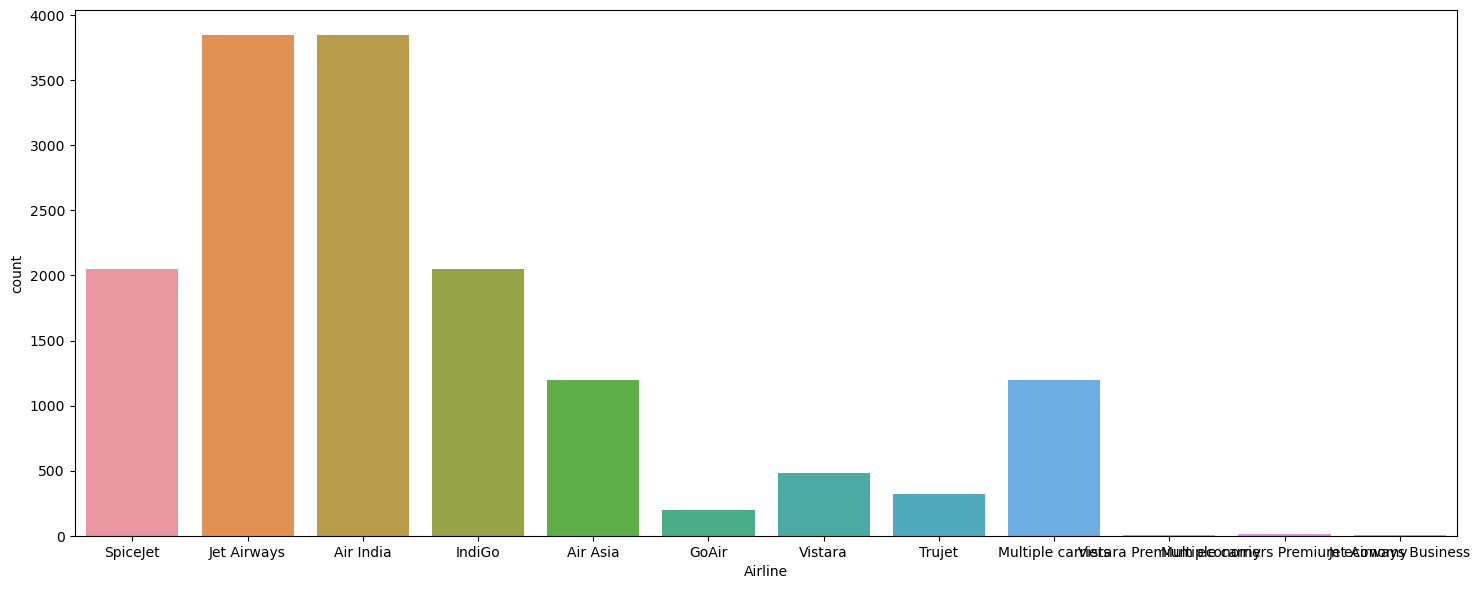

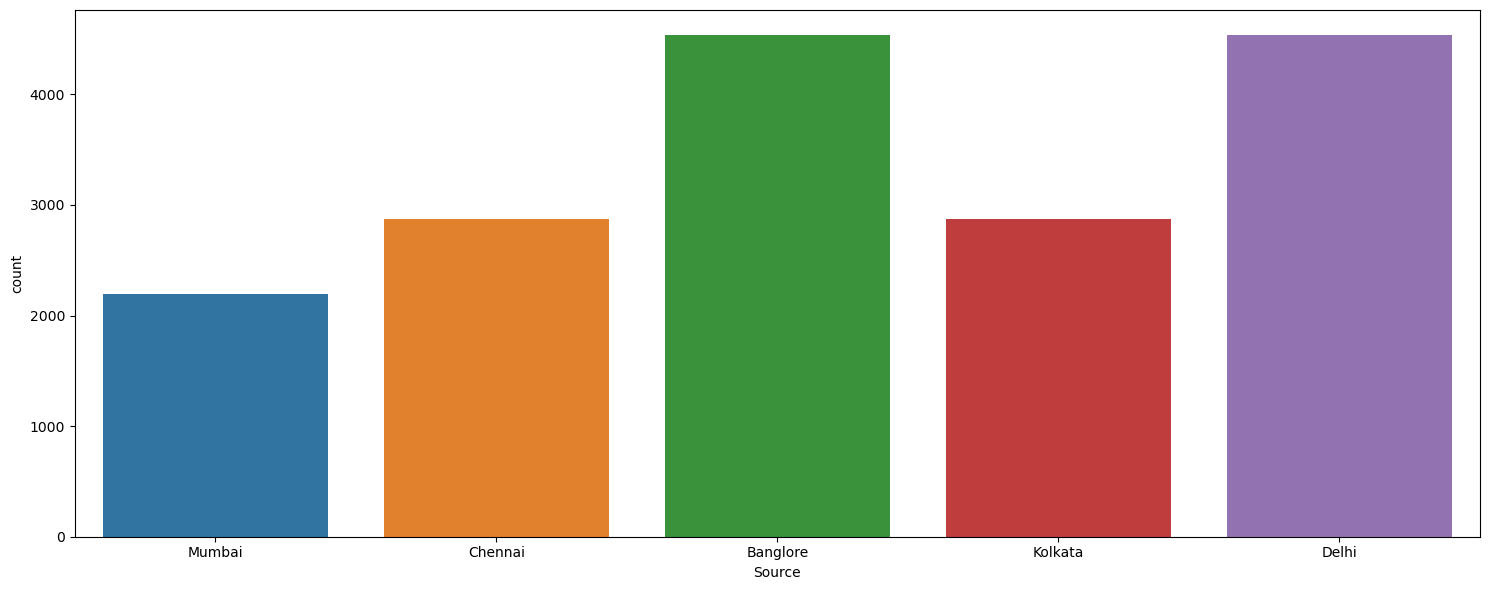

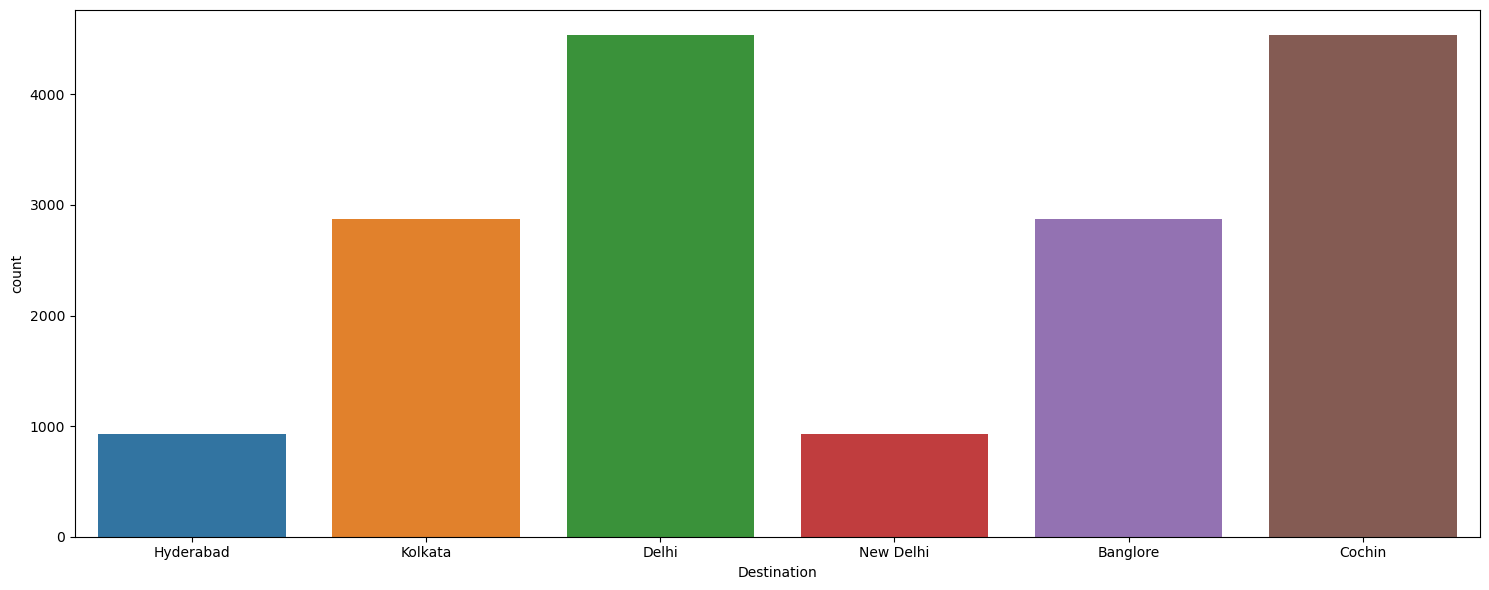

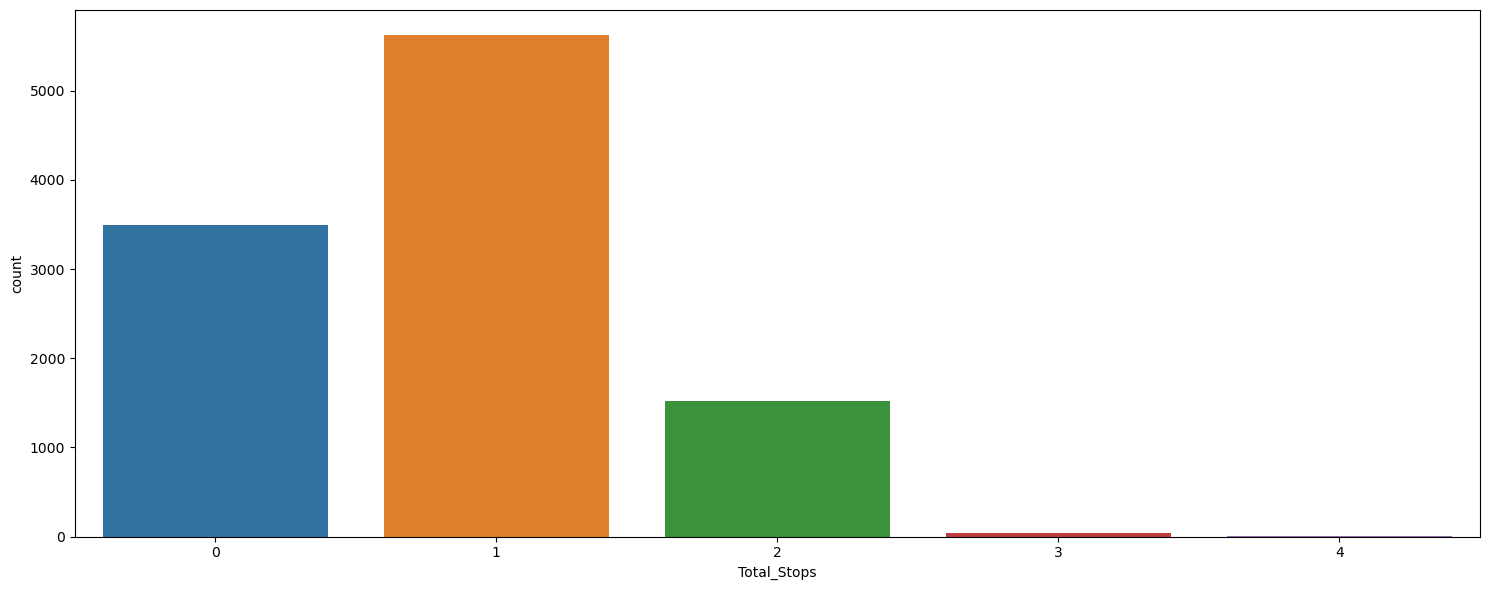

In [168]:
for i in ['Airline', 'Source', 'Destination', 'Total_Stops']:
    plt.figure(figsize=(15,6)) #(15x6 inches)
    sns.countplot(data= data,x=i)  #seaborn library
    ax=sns.countplot(x=i,data=data.sort_values('Price',ascending=True))
    plt.tight_layout()
    plt.show()
    print('\n\n')
    

In [169]:
#see probelm in first , x axis has very big names hence overlap sooo?
#so u rotate 

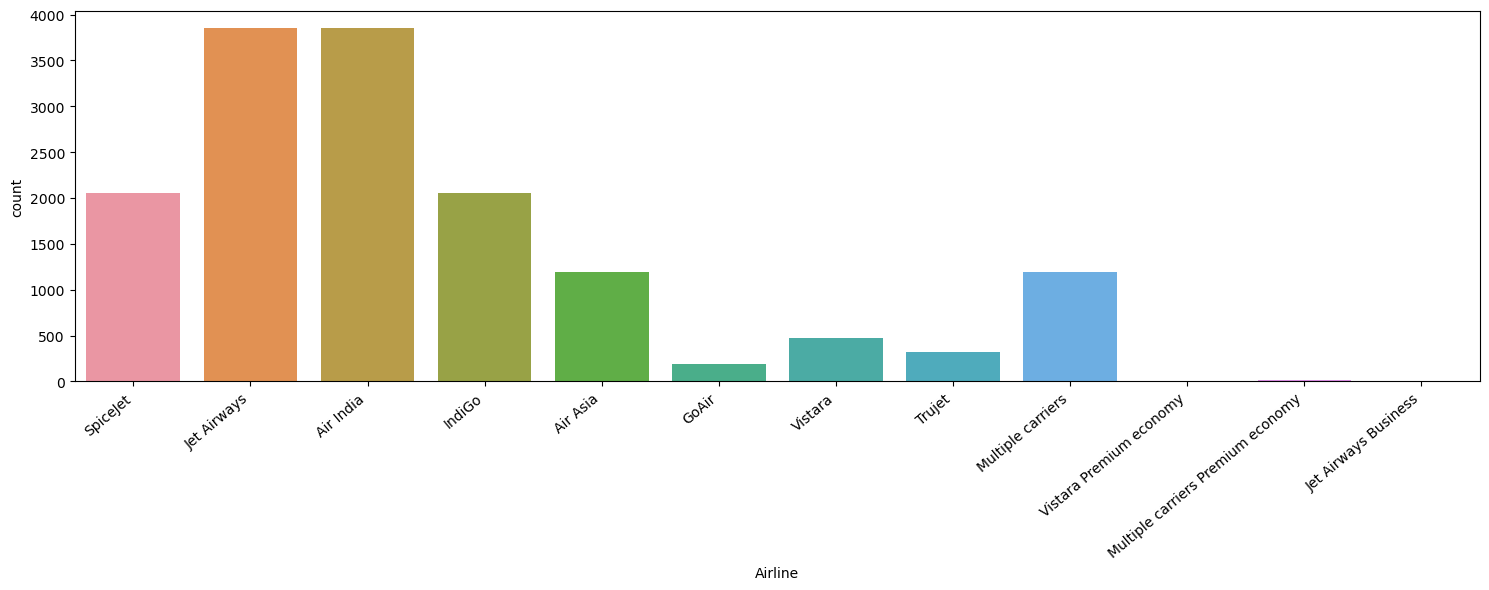

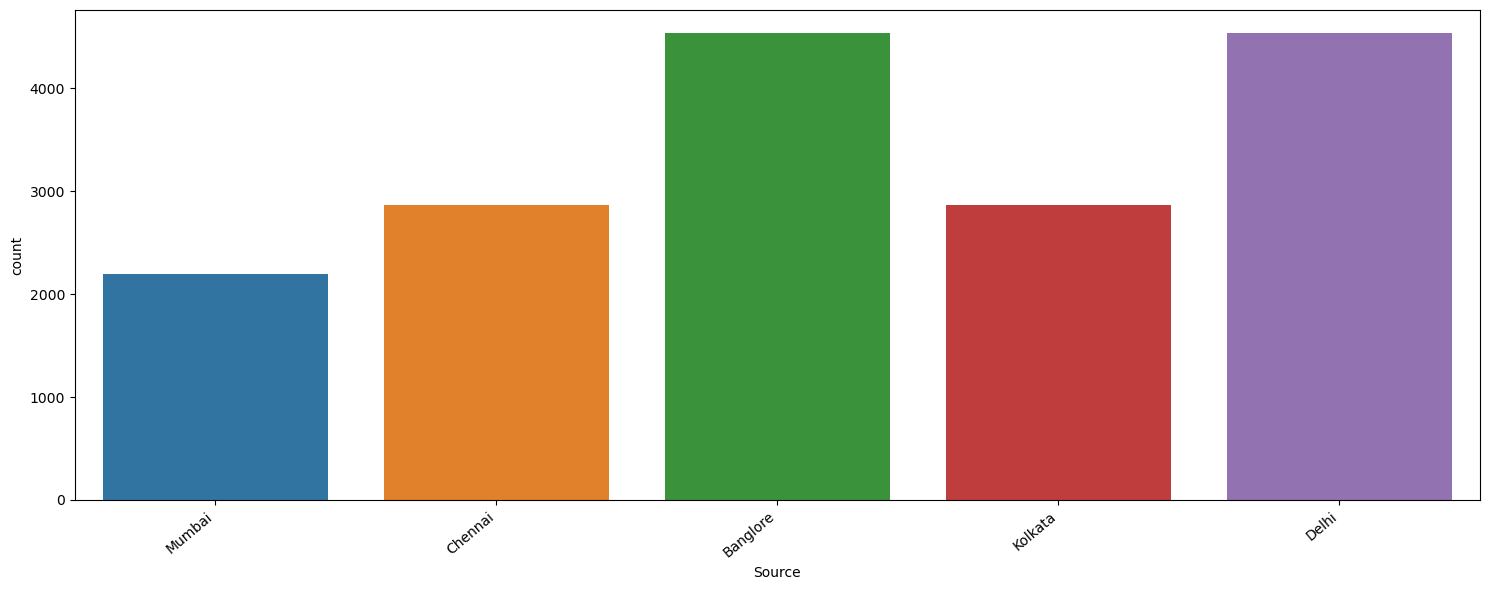

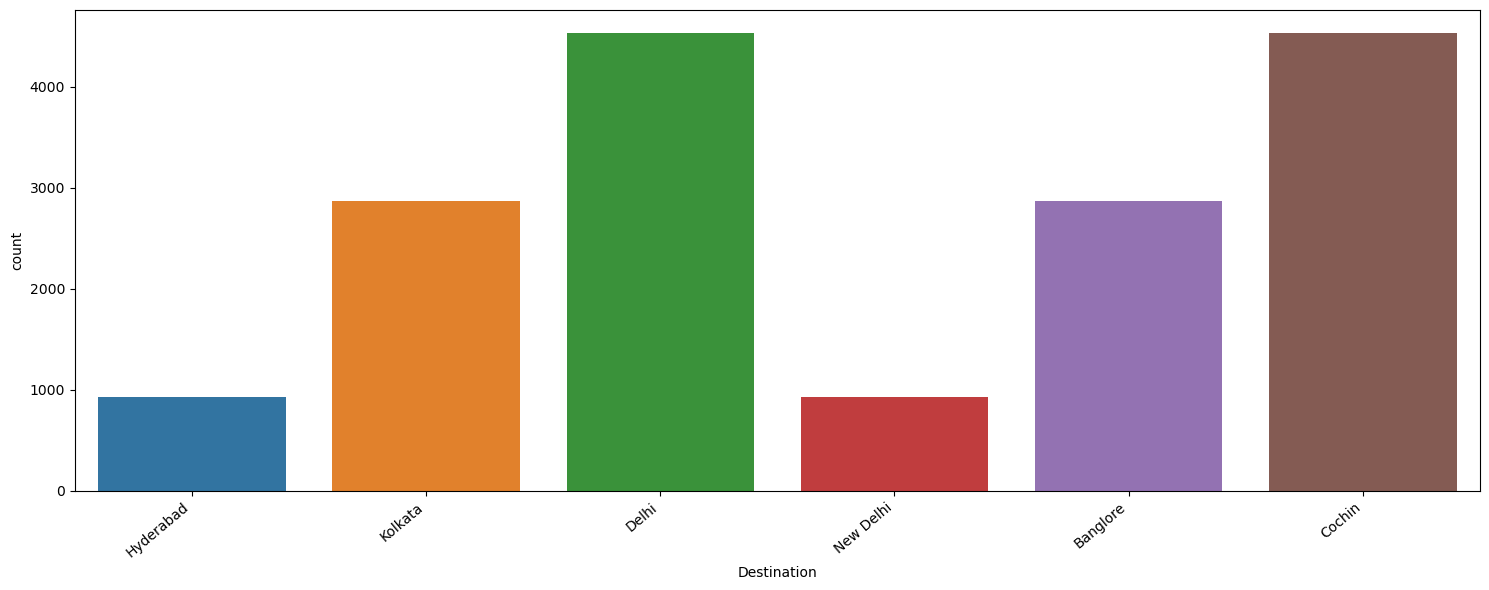

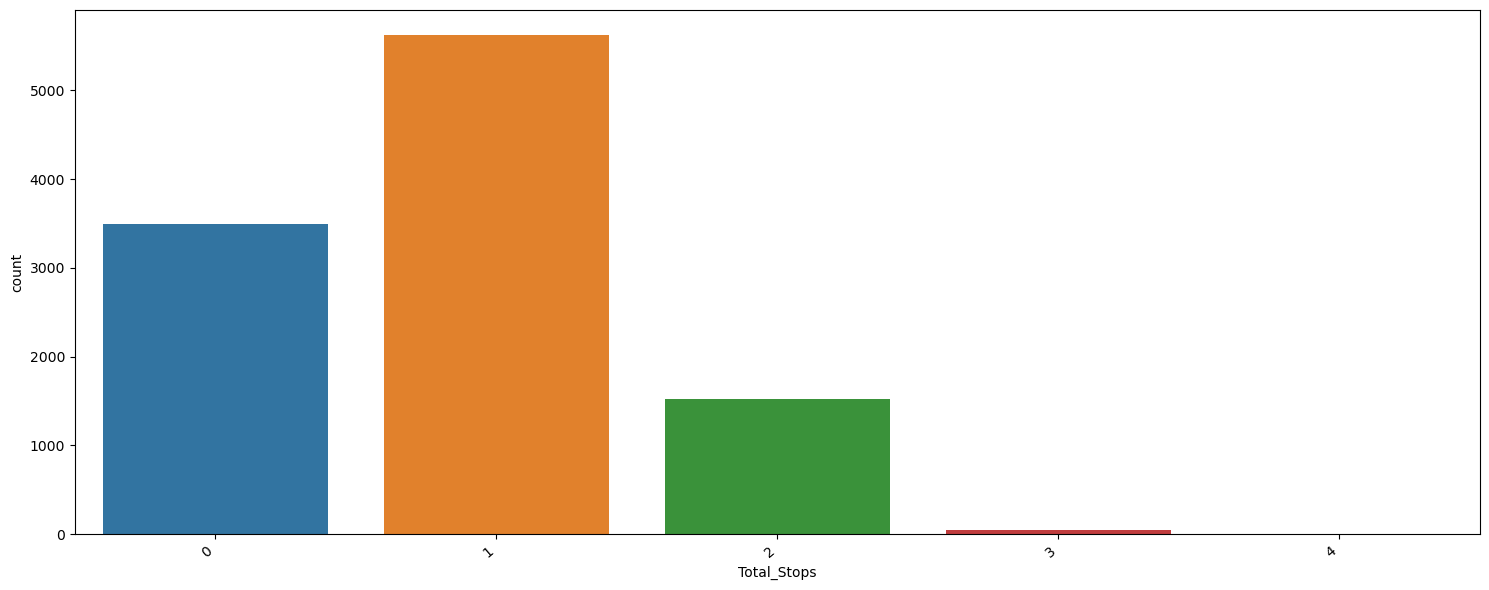

In [170]:
for i in ['Airline', 'Source', 'Destination', 'Total_Stops']:
    plt.figure(figsize=(15,6)) #(15x6 inches)
    sns.countplot(data= data,x=i)  #seaborn library
    ax=sns.countplot(x=i,data=data.sort_values('Price',ascending=True))
    ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
    plt.tight_layout()
    plt.show()
    print('\n\n')
    

In [171]:
#Now exploring airline col/feature

In [172]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

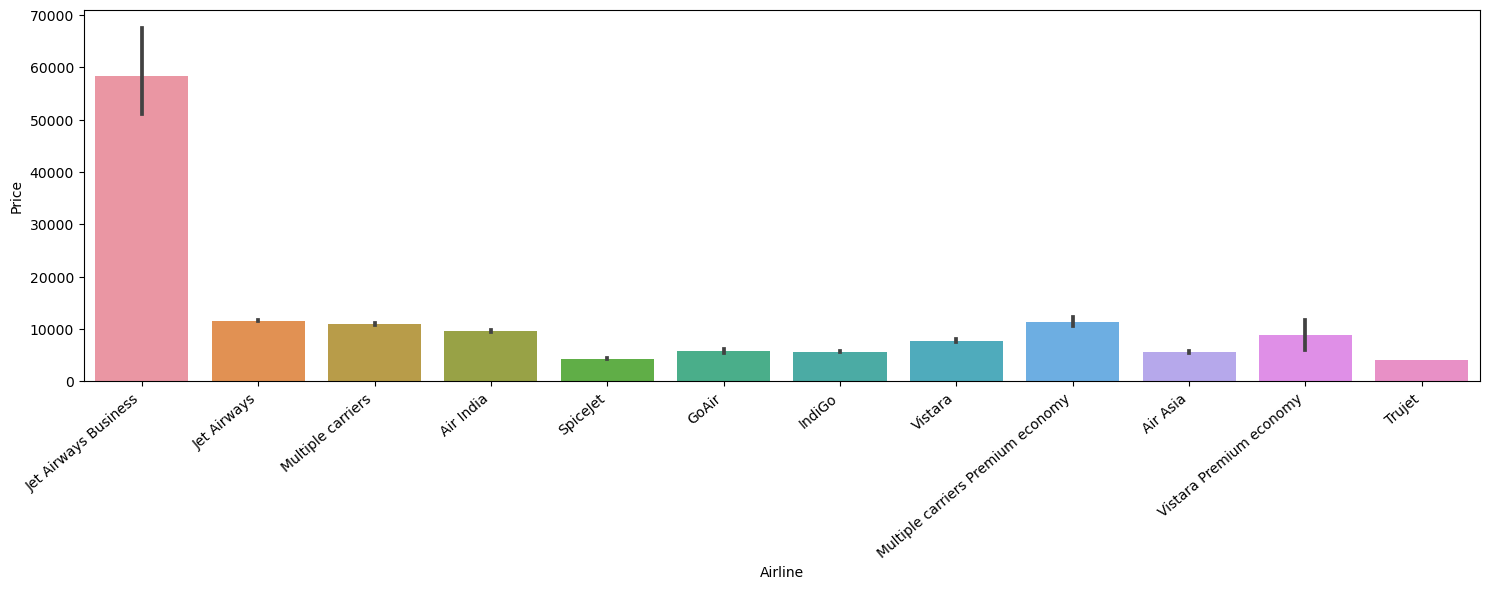

In [173]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='Airline',y='Price',data=data.sort_values('Price',ascending=False))
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
plt.tight_layout()
plt.show()

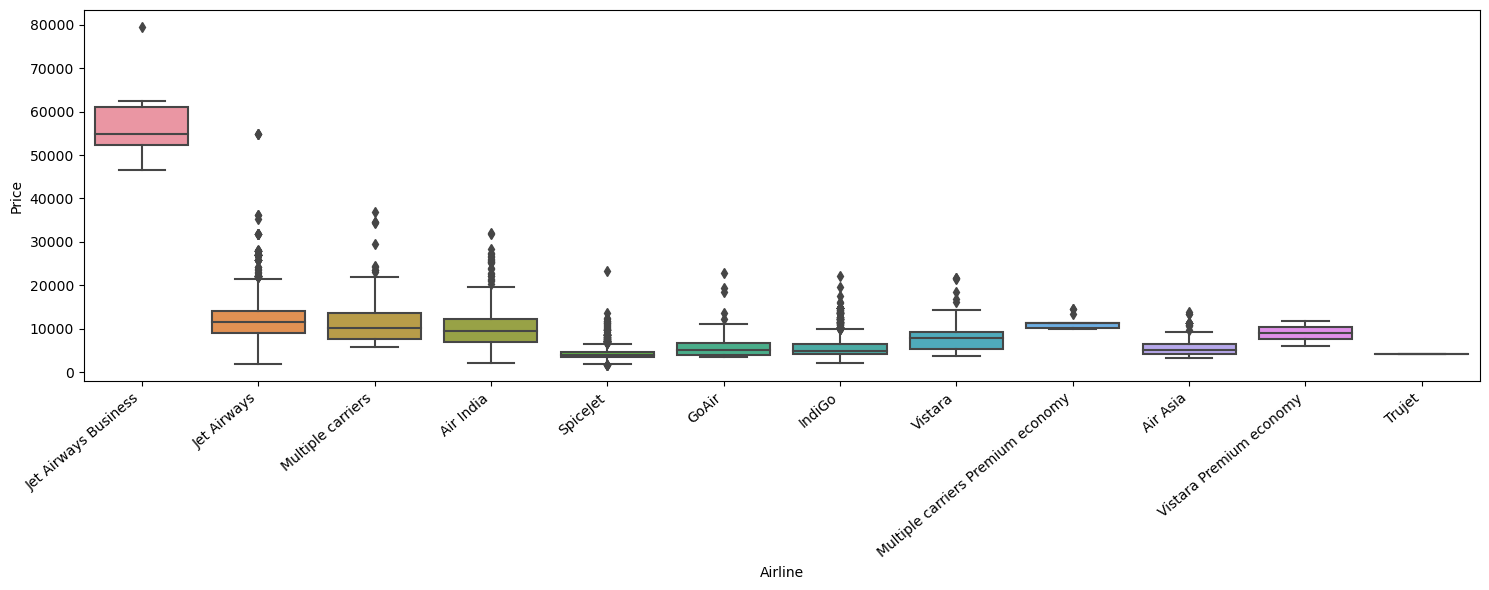

In [174]:
plt.figure(figsize=(15,6))
ax=sns.boxplot(x='Airline',y='Price',data=data.sort_values('Price',ascending=False))
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
plt.tight_layout()
plt.show()

In [175]:
#dots flying somewhere up abv others point and box themselves are outliners 

In [176]:
data.groupby('Airline').describe()['Price'].sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Jet Airways Business,6.0,58358.666667,11667.596748,46490.0,52243.0,54747.0,61122.50,79512.0
Jet Airways,3849.0,11643.923357,4258.940578,1840.0,9134.0,11467.0,14151.00,54826.0
Multiple carriers Premium economy,13.0,11418.846154,1717.153936,9845.0,10161.0,11269.0,11269.00,14629.0
Multiple carriers,1196.0,10902.678094,3721.234997,5797.0,7723.0,10197.0,13587.00,36983.0
Air India,1751.0,9612.427756,3901.734561,2050.0,6891.0,9443.0,12219.00,31945.0
Vistara Premium economy,3.0,8962.333333,2915.405518,5969.0,7547.0,9125.0,10459.00,11793.0
Vistara,479.0,7796.348643,2914.298578,3687.0,5403.0,7980.0,9345.00,21730.0
GoAir,194.0,5861.056701,2703.585767,3398.0,3898.0,5135.0,6811.25,22794.0
IndiGo,2053.0,5673.682903,2264.142168,2227.0,4226.0,5000.0,6494.00,22153.0


In [177]:
#we have all data but in object data type , we data scientist convert it to numbers : encoding , 
#we use 1 - hot encoding

In [178]:
Airline=pd.get_dummies(data['Airline'],drop_first= True) ##dumies : method to use 1-hot encoding

In [179]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [180]:
#alligning this to original data dataset
data=pd.concat([data,Airline],axis=1)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,BLR → DEL,122,0,3897,22,22,1,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,427,2,7662,5,5,13,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,9,4,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,305,1,6218,18,18,23,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,244,1,13302,16,16,21,...,0,1,0,0,0,0,0,0,0,0


In [181]:
#so now we drop Airline column
data.drop('Airline',axis=1,inplace= True)

In [182]:
data.head()

,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,122,0,3897,22,22,1,1,...,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,427,2,7662,5,5,13,13,...,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,9,4,4,...,0,0,1,0,0,0,0,0,0,0
3,Kolkata,Banglore,CCU → NAG → BLR,305,1,6218,18,18,23,23,...,0,1,0,0,0,0,0,0,0,0
4,Banglore,New Delhi,BLR → NAG → DEL,244,1,13302,16,16,21,21,...,0,1,0,0,0,0,0,0,0,0


In [183]:
list1=['Source','Destination']
for l in list1:
    print(data[[l]].value_counts(),'\n')

Source  
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
dtype: int64 

Destination
Cochin         4536
Banglore       2871
Delhi          1265
New Delhi       932
Hyderabad       697
Kolkata         381
dtype: int64 



In [184]:
data = pd.get_dummies(data= data,columns = list1,drop_first= True)
data.head()

,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,122,0,3897,22,22,1,1,24,3,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,427,2,7662,5,5,13,13,5,1,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,1140,2,13882,9,9,4,4,6,9,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,305,1,6218,18,18,23,23,5,12,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,244,1,13302,16,16,21,21,3,1,...,0,0,0,0,0,0,0,0,0,1


In [185]:
route = data[['Route']]
route.head()

,Route
0,BLR → DEL
1,CCU → IXR → BBI → BLR
2,DEL → LKO → BOM → COK
3,CCU → NAG → BLR
4,BLR → NAG → DEL


In [186]:
#ooo dealing with special characters

In [187]:
route['Route_1']=route['Route'].str.split('→').str[0]  #copy past special charac
route['Route_2']=route['Route'].str.split('→').str[1] 
route['Route_3']=route['Route'].str.split('→').str[2] 
route['Route_4']=route['Route'].str.split('→').str[3] 
route['Route_5']=route['Route'].str.split('→').str[4] 
route.head()

C:\Users\varun\AppData\Local\Temp\ipykernel_10216\1185758895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['Route_1']=route['Route'].str.split('→').str[0]  #copy past special charac
C:\Users\varun\AppData\Local\Temp\ipykernel_10216\1185758895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['Route_2']=route['Route'].str.split('→').str[1]
C:\Users\varun\AppData\Local\Temp\ipykernel_10216\1185758895.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,NaN,NaN,NaN
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,NaN
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,NaN
3,CCU → NAG → BLR,CCU,NAG,BLR,NaN,NaN
4,BLR → NAG → DEL,BLR,NAG,DEL,NaN,NaN


In [188]:
route.fillna('None',inplace=True) #replace NaN with None for missin val
route.head()

C:\Users\varun\AppData\Local\Temp\ipykernel_10216\169760707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route.fillna('None',inplace=True) #replace NaN with None for missin val


,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,None,None,None
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,None
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,None
3,CCU → NAG → BLR,CCU,NAG,BLR,None,None
4,BLR → NAG → DEL,BLR,NAG,DEL,None,None


In [189]:
#here multiple variety val so we use not 1 hot rather label encoder

In [190]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for i in  range(1,6):
    col='Route_' + str(i)
    route[col]=le.fit_transform(route[col])
    
route.head()

C:\Users\varun\AppData\Local\Temp\ipykernel_10216\2613317002.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route[col]=le.fit_transform(route[col])
C:\Users\varun\AppData\Local\Temp\ipykernel_10216\2613317002.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route[col]=le.fit_transform(route[col])
C:\Users\varun\AppData\Local\Temp\ipykernel_10216\2613317002.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,0,13,29,13,5
1,CCU → IXR → BBI → BLR,2,25,1,3,5
2,DEL → LKO → BOM → COK,3,32,4,5,5
3,CCU → NAG → BLR,2,34,3,13,5
4,BLR → NAG → DEL,0,34,8,13,5


In [191]:
route.drop('Route',axis=1,inplace=True)

C:\Users\varun\AppData\Local\Temp\ipykernel_10216\1543737164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route.drop('Route',axis=1,inplace=True)


In [192]:
route.head()

,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,13,29,13,5
1,2,25,1,3,5
2,3,32,4,5,5
3,2,34,3,13,5
4,0,34,8,13,5


In [193]:
data= pd.concat([data,route],axis=1)

In [194]:
data.head()

,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,122,0,3897,22,22,1,1,24,3,...,0,0,0,0,1,0,13,29,13,5
1,CCU → IXR → BBI → BLR,427,2,7662,5,5,13,13,5,1,...,0,0,0,0,0,2,25,1,3,5
2,DEL → LKO → BOM → COK,1140,2,13882,9,9,4,4,6,9,...,1,0,0,0,0,3,32,4,5,5
3,CCU → NAG → BLR,305,1,6218,18,18,23,23,5,12,...,0,0,0,0,0,2,34,3,13,5
4,BLR → NAG → DEL,244,1,13302,16,16,21,21,3,1,...,0,0,0,0,1,0,34,8,13,5


In [195]:
data.drop('Route',axis=1,inplace=True)
data.head()

,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month,Air India,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,122,0,3897,22,22,1,1,24,3,0,...,0,0,0,0,1,0,13,29,13,5
1,427,2,7662,5,5,13,13,5,1,1,...,0,0,0,0,0,2,25,1,3,5
2,1140,2,13882,9,9,4,4,6,9,0,...,1,0,0,0,0,3,32,4,5,5
3,305,1,6218,18,18,23,23,5,12,0,...,0,0,0,0,0,2,34,3,13,5
4,244,1,13302,16,16,21,21,3,1,0,...,0,0,0,0,1,0,34,8,13,5


In [196]:
## PART TWO DONE : WE HAVE GOT CLEAN DATASET WITH NUMBERS ONLY
## PART 3 BEGINS

In [197]:
#BUILDING THE MACHINE LEARNING MODEL

In [198]:
data.head()

,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month,Air India,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,122,0,3897,22,22,1,1,24,3,0,...,0,0,0,0,1,0,13,29,13,5
1,427,2,7662,5,5,13,13,5,1,1,...,0,0,0,0,0,2,25,1,3,5
2,1140,2,13882,9,9,4,4,6,9,0,...,1,0,0,0,0,3,32,4,5,5
3,305,1,6218,18,18,23,23,5,12,0,...,0,0,0,0,0,2,34,3,13,5
4,244,1,13302,16,16,21,21,3,1,0,...,0,0,0,0,1,0,34,8,13,5


In [199]:
# see the difference in no of digits of duration over arrival may cuz misinterpretation of it being more influential so we do NORMALIZATION

In [200]:
temp_col=data.columns.to_list()
print(temp_col,'\n')
new_col = temp_col[:2]+temp_col[3:]
new_col.append(temp_col[2])
print(new_col,'\n')

data=data.reindex(columns=new_col)
data.head()

['Duration', 'Total_Stops', 'Price', 'Dep_Time_in_hours', 'Dep_Time_in_minutes', 'Arrival_Time_in_hours', 'Arrival_Time_in_minutes', 'Day', 'Month', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'] 

['Duration', 'Total_Stops', 'Dep_Time_in_hours', 'Dep_Time_in_minutes', 'Arrival_Time_in_hours', 'Arrival_Time_in_minutes', 'Day', 'Month', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin', 

,Duration,Total_Stops,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month,Air India,GoAir,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5,Price
0,122,0,22,22,1,1,24,3,0,0,...,0,0,0,1,0,13,29,13,5,3897
1,427,2,5,5,13,13,5,1,1,0,...,0,0,0,0,2,25,1,3,5,7662
2,1140,2,9,9,4,4,6,9,0,0,...,0,0,0,0,3,32,4,5,5,13882
3,305,1,18,18,23,23,5,12,0,0,...,0,0,0,0,2,34,3,13,5,6218
4,244,1,16,16,21,21,3,1,0,0,...,0,0,0,1,0,34,8,13,5,13302


In [201]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
data=scaler.fit_transform(data)

data[0]
##scaler used for our purpose

array([-0.97029579, -1.22066609,  1.65415376,  1.65415376, -1.80043628,
       -1.80043628,  1.28553644, -0.84844966, -0.44278513, -0.13600489,
        2.05015058, -0.75053033, -0.02370671, -0.35507822, -0.03490678,
       -0.28797191, -0.00967596, -0.21667251, -0.01676082, -0.19231927,
       -0.85909313, -0.60626609, -0.2642058 , -0.85909313, -0.36651266,
       -0.2642058 , -0.19231927,  3.23440464, -1.67418972,  0.13765097,
        1.39512392,  0.40974412,  0.06420744, -1.12553455])

In [202]:
from sklearn.model_selection import train_test_split as tts

x= data[:, :-1] 
y=data[:,-1]
# get me all data of x and all but 1 of y (price col is target so not needed
# )


In [203]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.1,random_state= 69)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9613, 33)
(1069, 33)
(9613,)
(1069,)


Regression Model


In [204]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [205]:
#evaluating using metrics 
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_true,y_predicted):
    print(f'RMSE:', mean_squared_error(y_true,y_predicted)**0.5)
    print(f'R_Squared value:',r2_score(y_true,y_predicted))

def accuracy(y_true,y_predicted):
    errors=abs(y_true-y_predicted)
    mape=100*np.mean(errors/y_true)
    #mean arthmetic percentage error
    accuracy=100-mape
    return accuracy

In [206]:
y_predicted=model.predict(x_test)

In [207]:
metrics(y_test,y_predicted)

RMSE: 0.5360798954060105
R_Squared value: 0.6461851882844569


In [208]:
accuracy(y_test,y_predicted)

69.75096843251438

In [209]:
##now lets try to make it better
#here we using algorithm 
#random forest

In [210]:
##we use ensemble technique : random forest

In [252]:
from sklearn.ensemble import RandomForestRegressor

model_random_forest = RandomForestRegressor(n_estimators = 100 , min_samples_split = 15)
model_random_forest.fit(x_train,y_train)

RandomForestRegressor(min_samples_split=15)

In [253]:
pred_rf=model_random_forest.predict(x_test)

In [254]:
metrics(y_test,pred_rf)

RMSE: 0.36148467196498363
R_Squared value: 0.8391219688498224


In [255]:
accuracy(y_test,pred_rf)

99.17392959863726

In [239]:
##exceptionaly high accuracy!

# END OF PROJECT 